#**Deep Learning Homework 3: Convolutional Neural Networks**

### MSc Computer Science, Data Science, Cybersecurity @UniPD
### 2nd semester - 6 ECTS
### Prof. Nicolò Navarin & Prof. Alessandro Sperduti
---
In this homework, we will explore how to develop a simple Convolutional Neural Network for image classification. We will use the CIFAR-10 dataset. In the first part, we will learn how to develop a simple CNN, while in the second part we will explore the impact of various hyper-parameters in the learning performances.

##Exercise 3.1: Simple CNN

Let's start by importing Tensorflow, Keras and Numpy

In [15]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

###Load dataset:
### Load Data: CIFAR-10 dataset


We will use the CIFAR-10 dataset.The dataset consists of 60000 images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. Each sample is a 32x32 pixels color image, associated with a label from 10 classes:

```
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
```

Each pixel intensity is represented by a `uint8` (byte) from 0 to 255.
We will divide the dataset in training, testing and validation set. As you already know, the training set will be used to train the model, the validation set will be used to perform model selection and finally, the test set will be used to asses the performance of deep network.

Since we will use a [2DConv](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) we have to provide also a new dimension of the input that represents the number of channels (that in grey scale image is just one and in color images is 3). Therefore, if you are using grayscale images use [tf.expand_dims](https://www.tensorflow.org/api_docs/python/tf/expand_dims#:~:text=Used%20in%20the%20notebooks,-Used%20in%20the&text=This%20operation%20is%20useful%20to,to%20a%20tensor%20of%20scalars) to transform each image from a matrix to a 3-dimensional tensor. Finally, we have to normalize the input data.

In [16]:
cifar_10 = keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = (
    cifar_10.load_data()) # The dataset is already divede in test and training

# We extract the first 5000 samples of the training set, to use them as the validation set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]


Let's take a look at a sample of the images in the dataset:

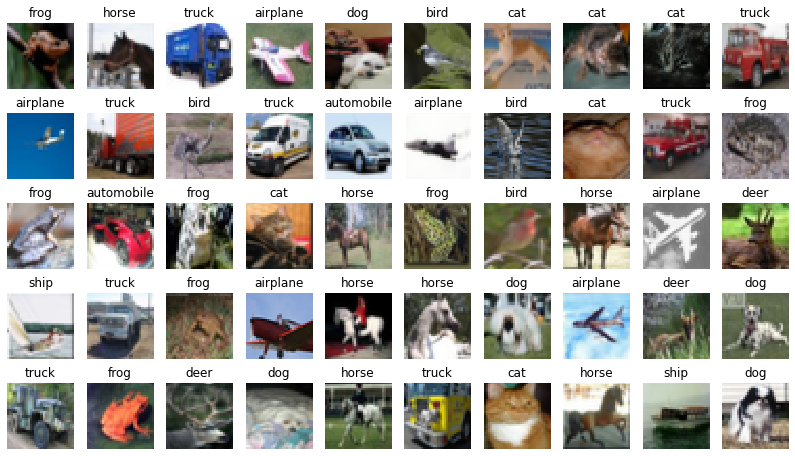

In [17]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols * 1.4, n_rows * 1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index][0]])
plt.show()

### [TO COMPLETE] Input Normalization:

When using Gradient Descent, it is usually a good idea to ensure that all the features have a similar scale. Try to standardize the pixel values.

In [18]:
#[TO COMPLETE]: define X_train_scaled, X_valid_scaled and X_test_scaled, the sets that contains 
#Hint: For each feature (pixel intensity), you must subtract the mean() of that 
#feature (across all instances, so use axis=0) and divide by its standard 
#deviation (std(), again axis=0)

# for train normalization
mean=X_train.mean(axis=(0), keepdims=True)
std=X_train.std(axis=(0), keepdims=True)

X_train = (X_train - mean) / std 
X_valid = (X_valid - mean) / std 
X_test = (X_test - mean) / std 

#Make sure you compute the means and standard deviations on the training set,
#and use these statistics to scale the training set, the validation set and the
# test set

###Define the model

Let's create a simple CNN. The model will be composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 ([MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D))
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function to ensure that the sum of all the estimated class probabilities for each image is equal to 1.
Note that as 'input_shape' attribute's value in the first layer report also the third dimension that represents the channel.

In [19]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], padding="same", activation="relu", input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])


Print the model summary

In [20]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                81930     
Total params: 82,826
Trainable params: 82,826
Non-trainable params: 0
_________________________________________________________________


Note that the number of parameters mostly depends on the output layers, indeed the parameter sharing techinique used by the 2D convolutional layers allows to significantly reduce the number of learnable weights.
Now we can train the model.

In [21]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
352/352 [==============================] - 2s 4ms/step - loss: 1.4705 - accuracy: 0.4864 - val_loss: 1.2595 - val_accuracy: 0.5602
Epoch 2/10
352/352 [==============================] - 1s 4ms/step - loss: 1.1580 - accuracy: 0.6004 - val_loss: 1.1232 - val_accuracy: 0.6088
Epoch 3/10
352/352 [==============================] - 1s 4ms/step - loss: 1.0424 - accuracy: 0.6394 - val_loss: 1.1108 - val_accuracy: 0.6188
Epoch 4/10
352/352 [==============================] - 1s 4ms/step - loss: 0.9656 - accuracy: 0.6693 - val_loss: 1.0653 - val_accuracy: 0.6334
Epoch 5/10
352/352 [==============================] - 1s 4ms/step - loss: 0.9157 - accuracy: 0.6863 - val_loss: 1.0589 - val_accuracy: 0.6308
Epoch 6/10
352/352 [==============================] - 1s 4ms/step - loss: 0.8709 - accuracy: 0.7032 - val_loss: 1.0236 - val_accuracy: 0.6486
Epoch 7/10
352/352 [==============================] - 1s 4ms/step - loss: 0.8363 - accuracy: 0.7156 - val_loss: 1.0352 - val_accuracy: 0.6514
Epoch 

Plot the loss and the accuracy trends for the training and validation set. Then, compute the result on the test set.

313/313 - 1s - loss: 1.0298 - accuracy: 0.6492
accuracy: 64.92%


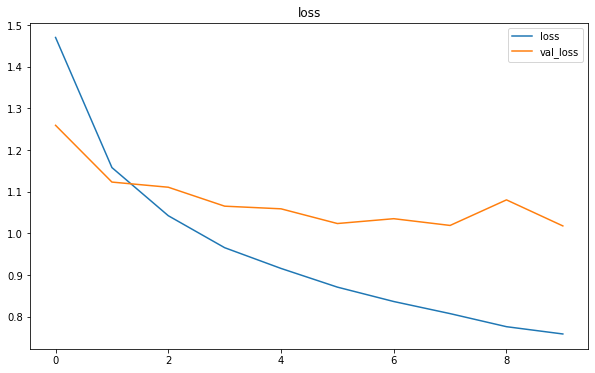

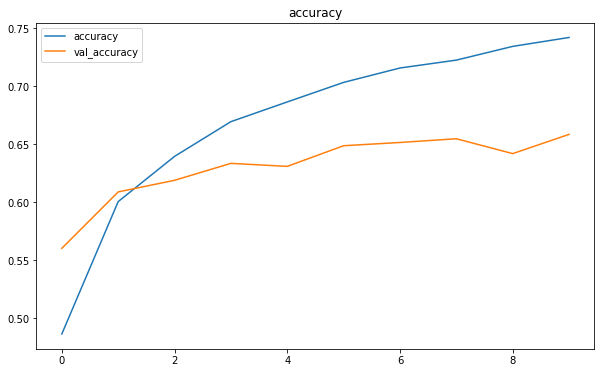

In [22]:
def plot_loss(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['loss'], label='loss')
  plt.plot(history.epoch,history.history['val_loss'],label='val_loss')
  plt.title('loss')
  plt.legend()
  
def plot_accuracy(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['accuracy'],label='accuracy')
  plt.plot(history.epoch,history.history['val_accuracy'],label='val_accuracy')
  plt.title('accuracy')
  plt.legend()
  
plot_loss(history)

plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



###Visualize Weights

An interesting thing to do is to visualize the learned weights for the convolutional layer. We have 32 kernels of size 3x3, we can just plot them as images, mapping the weight values to grayscale.

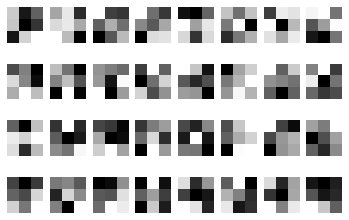

In [23]:
# Weights for the first convolutional layer
w0=model.get_weights()[0][:,:,0,:]

# Normalize to range 0.0 - 1.0
w0-=np.min(w0)
w0/=np.max(w0)

for r in range(4):
    for c in range(8):
        n=r*8+c
        plt.subplot(4, 8, n+1)
        plt.imshow(w0[:,:,n], interpolation='none')
        plt.axis('off')
        plt.gray()
plt.show()

They might be a bit hard to interpret, but it seems that the various filters have learned to detect various corners and edges.

### [TO COMPLETE] Deep CNN
Let's consider a deeper model, more precily in this exercise we consider a model composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 
* One 2D convolutional layer with kernel size 2x2 and 16 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function


In [24]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
  
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 14, 14, 16)        2064      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                7850      
Total params: 10,810
Trainable params: 10,810
Non-trainable params: 0
__________________________________________________

[TO COMPLETE] Explain in this cell: 

1.   how the number of parameters on each of the two Conv2D layers is determined;
2.   the reasons why the two considered convolutional layers have a different number of parameters.

Answers:

The general formula to compute the number of filters in a CONV layer is the following:

    --> ((filter_width * filter_height * num_filters_prev_layer) + 1) * num_filters_current_layer

1.  Just applying the formula wrote above we would obtain :
    --> 32(3x3x3 +1) 

    +1 due to the bias

    
2.   It's easy to see that the 2 convolutional layers have different params. Why? 
    Well, in particular even if we   have  a smaller kernel size for the second CONV layers, Its number of prev_layer_filters is bigger (compare with the first CONV layers, that had the 3 of the rg images). 
    Sobstituing the numbers we would obtain:
    --> ((2x2x32) +1 ) x  16 = 2064

Let's now train our deep CNN.

Epoch 1/10
352/352 [==============================] - 2s 5ms/step - loss: 1.6137 - accuracy: 0.4220 - val_loss: 1.3750 - val_accuracy: 0.5184
Epoch 2/10
352/352 [==============================] - 1s 4ms/step - loss: 1.3006 - accuracy: 0.5433 - val_loss: 1.2425 - val_accuracy: 0.5646
Epoch 3/10
352/352 [==============================] - 2s 4ms/step - loss: 1.1922 - accuracy: 0.5835 - val_loss: 1.1593 - val_accuracy: 0.5986
Epoch 4/10
352/352 [==============================] - 2s 4ms/step - loss: 1.1122 - accuracy: 0.6145 - val_loss: 1.0864 - val_accuracy: 0.6278
Epoch 5/10
352/352 [==============================] - 2s 4ms/step - loss: 1.0562 - accuracy: 0.6350 - val_loss: 1.0741 - val_accuracy: 0.6256
Epoch 6/10
352/352 [==============================] - 2s 4ms/step - loss: 1.0153 - accuracy: 0.6492 - val_loss: 1.0163 - val_accuracy: 0.6486
Epoch 7/10
352/352 [==============================] - 1s 4ms/step - loss: 0.9870 - accuracy: 0.6591 - val_loss: 1.0192 - val_accuracy: 0.6464
Epoch 

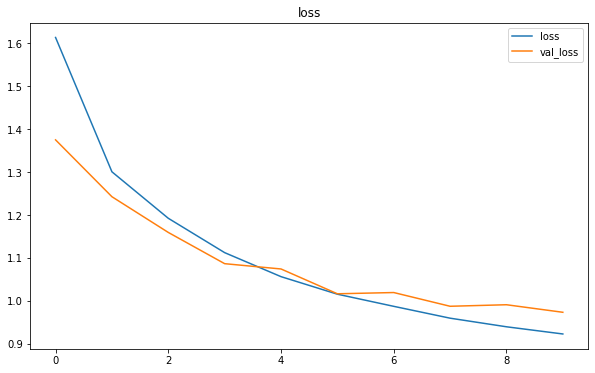

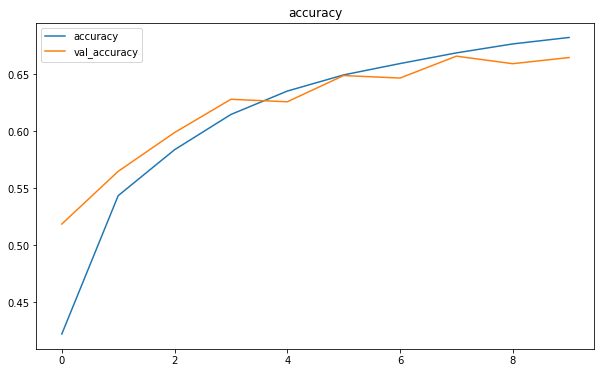

In [25]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

## [TO COMPLETE] Exercise 3.2: Develop a better CNN
Let's develop a network that performs better than the very simple one above. This exercise aims to explore how much the various hyper-parameters influence the classification capability of the model. 

**[TO COMPLETE]**: Your task is to modify some of the hyper-parameters of the previous exercise's network and compare the results. At least one of the models you try should have an improvement in the test set results (generalization) over the result of the model used in the previous exercise.
In the cell below report only the code of the **best model** that you can find. In addtion, print out its result on the test set, and plot the accuracy and the loss trends in the notebook you return.
Moreover, for each setup you test, analyze and discuss the obtained results briefly in the last cells at the bottom.

Hint: Each reparameterization should change a different aspect in the network, while the rest of the parameters would stay the same. 
Example parameters to try to change (we suggest to test at least one re-parametrization for each of these categories):

*    number of layers or neurons or filters dimension
*   activation functions
*   epochs
*   batch sizes
*   optimizer, see TensorFlow documentation on [optimizers](https://https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
*   max-pooling on/off on certain layers, or pool size

For what concerns the optimizer, as you can see in the 'compile' method [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) is it possible to pass as 'optimizer ' attribute's value a string (the name of optimizer) or an optimizer instance.

Notice that changing the final layer's softmax activation plus the categorical_crossentropy loss requires some consideration. Don't do it unless you have a good plan.

In [26]:
#[TO COMPLETE] model example 01
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=[3,3], activation='relu', input_shape=[32,32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=256, kernel_size=[2,2], activation='relu'),
    # keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(.5, input_shape=(2,)),
    keras.layers.Conv2D(filters=256, kernel_size=[4,4], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=128, kernel_size=[2,2], activation='relu'),
    keras.layers.Dropout(.3, input_shape=(2,)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
  
print(model.summary())

history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid, y_valid))

# plot_loss(history)
# plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 14, 14, 256)       131328    
_________________________________________________________________
dropout_12 (Dropout)         (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 11, 11, 256)       1048832   
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 256)         0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 4, 4, 128)        

In [27]:
#[TO COMPLETE] model example 02
# dropout may increase the performance even more, so lets add another one

import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
import numpy as np

weight_decay = 1e-4

model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=[32,32,3]))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
 
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
  
# print(model.summary())

history = model.fit(X_train, y_train, epochs=10, batch_size=16,
                  validation_data=(X_valid, y_valid), verbose=2)

# plot_loss(history)
# plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

Epoch 1/10
2813/2813 - 20s - loss: 1.7255 - accuracy: 0.4796 - val_loss: 1.1337 - val_accuracy: 0.6346
Epoch 2/10
2813/2813 - 19s - loss: 1.0715 - accuracy: 0.6568 - val_loss: 0.8775 - val_accuracy: 0.7310
Epoch 3/10
2813/2813 - 20s - loss: 0.9246 - accuracy: 0.7152 - val_loss: 0.7747 - val_accuracy: 0.7698
Epoch 4/10
2813/2813 - 19s - loss: 0.8566 - accuracy: 0.7515 - val_loss: 0.7474 - val_accuracy: 0.7944
Epoch 5/10
2813/2813 - 19s - loss: 0.8215 - accuracy: 0.7721 - val_loss: 0.7400 - val_accuracy: 0.8078
Epoch 6/10
2813/2813 - 19s - loss: 0.7930 - accuracy: 0.7875 - val_loss: 0.7335 - val_accuracy: 0.8094
Epoch 7/10
2813/2813 - 19s - loss: 0.7714 - accuracy: 0.8004 - val_loss: 0.7560 - val_accuracy: 0.8100
Epoch 8/10
2813/2813 - 20s - loss: 0.7560 - accuracy: 0.8094 - val_loss: 0.7103 - val_accuracy: 0.8286
Epoch 9/10
2813/2813 - 19s - loss: 0.7484 - accuracy: 0.8157 - val_loss: 0.7263 - val_accuracy: 0.8280
Epoch 10/10
2813/2813 - 20s - loss: 0.7353 - accuracy: 0.8223 - val_loss:

### [TO COMPLETE] Example of tests discussion
The best model that I found is the one above. Here i will still paste the model structure:

    model = Sequential()
    model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=[32,32,3]))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))
    
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))

This is the best model that i tested so far. In order to achive this results I tested by myself may different structures and layers combinations, by:

-changing not only the orders but also the convolution filters and dimensions --  trying a pyramidal approach, revers pyramidal, random, all the same, ...)

-using different dropout combinations, w. different %'s

-testing also different act functions, even tho Relu confirms itself the best one so far

Before this last (and best performing model) there is also another one i create all by myself, which os able to reach an accuray in test set of 79%


The one I submit as best found so far is way bigger than the one I testes myself, obtain by testing and modifing different structures cites by various papers online. ( In order to achive a better acc, around > 85% there is indeed need of a dataAugmentator, else I would say is impossible)

This model structure is a extremization of the combinations I tests, since it uses many dropout with increaing %, conv of bigger filters dimensions, without changing the kernel size, and batch nommalization (which is a common characteristic to all the best performing model cite in papers)

The achieved accuracy in the test set is for this very last model is 80.37%

Paying attention to overfitting i belive is possible to reach an acuracy a bit higher, lets see...


In [30]:
weight_decay = 1e-4

model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=[32,32,3]))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
 
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
  
# print(model.summary())

history = model.fit(X_train, y_train, epochs=9, batch_size=16,
                  validation_data=(X_valid, y_valid), verbose=2)

# plot_loss(history)
# plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

Epoch 1/9
2813/2813 - 20s - loss: 1.7175 - accuracy: 0.4796 - val_loss: 1.1021 - val_accuracy: 0.6508
Epoch 2/9
2813/2813 - 19s - loss: 1.0710 - accuracy: 0.6564 - val_loss: 0.8859 - val_accuracy: 0.7236
Epoch 3/9
2813/2813 - 19s - loss: 0.9305 - accuracy: 0.7116 - val_loss: 0.8876 - val_accuracy: 0.7374
Epoch 4/9
2813/2813 - 19s - loss: 0.8640 - accuracy: 0.7477 - val_loss: 0.7825 - val_accuracy: 0.7806
Epoch 5/9
2813/2813 - 19s - loss: 0.8193 - accuracy: 0.7708 - val_loss: 0.7696 - val_accuracy: 0.7884
Epoch 6/9
2813/2813 - 19s - loss: 0.7905 - accuracy: 0.7876 - val_loss: 0.7295 - val_accuracy: 0.8188
Epoch 7/9
2813/2813 - 19s - loss: 0.7689 - accuracy: 0.8010 - val_loss: 0.7714 - val_accuracy: 0.8046
Epoch 8/9
2813/2813 - 20s - loss: 0.7506 - accuracy: 0.8121 - val_loss: 0.7512 - val_accuracy: 0.8168
Epoch 9/9
2813/2813 - 20s - loss: 0.7413 - accuracy: 0.8183 - val_loss: 0.7227 - val_accuracy: 0.8308
313/313 - 1s - loss: 0.7518 - accuracy: 0.8176
 accuracy: 81.76%
-----------------

In [31]:
scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

313/313 - 1s - loss: 0.7518 - accuracy: 0.8176
 accuracy: 81.76%
----------------------------


Just being aware of overfitting we increase the acc by 1%, which is a lot

FINAL ACCURACY 
81.76%